In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [35]:
data_directory = "clean-data/"
all_tsvs = ["ct", "iso_ne_ca", "me", "nema", "nh", "ri", "sema", "vt", "wcma"]
all_data = { file_name : pd.read_csv(data_directory + file_name + ".tsv", sep='\t', thousands=',', ) 
             for file_name in all_tsvs }

In [36]:
all_data["ct"].head()

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,1-Jan-17,1,2730.6,2842.29,34.84,34.86,0.0,-0.02,36.48,36.53,0.0,-0.05,NaN,NaN
1,1-Jan-17,2,2583.5,2706.95,33.80,33.72,0.0,0.08,37.01,37.02,0.0,-0.01,NaN,NaN
2,1-Jan-17,3,2498.3,2601.69,32.49,32.40,0.0,0.09,35.77,35.79,0.0,-0.02,NaN,NaN
3,1-Jan-17,4,2465.8,2535.49,25.98,25.88,0.0,0.10,34.06,34.04,0.0,0.02,NaN,NaN
4,1-Jan-17,5,2500.7,2524.59,29.71,29.65,0.0,0.06,35.42,35.36,0.0,0.06,NaN,NaN


Index(['Date', 'Hr_End', 'DA_Demand', 'RT_Demand', 'DA_LMP', 'DA_EC', 'DA_CC',
       'DA_MLC', 'RT_LMP', 'RT_EC', 'RT_CC', 'RT_MLC', 'Dry_Bulb',
       'Dew_Point'],
      dtype='object')
Date          object
Hr_End         int64
DA_Demand    float64
RT_Demand    float64
DA_LMP       float64
DA_EC        float64
DA_CC        float64
DA_MLC       float64
RT_LMP       float64
RT_EC        float64
RT_CC        float64
RT_MLC       float64
Dry_Bulb     float64
Dew_Point    float64
dtype: object


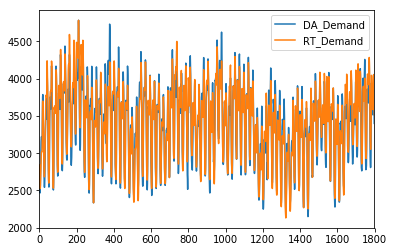

In [39]:
ct_data = all_data["ct"]
print(ct_data.columns)
print(ct_data.dtypes)
ct_data[['DA_Demand', 'RT_Demand']].plot()